In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

N      P      K  temperature  humidity     ph  rainfall  label
0     False  False  False        False     False  False     False  False
1     False  False  False        False     False  False     False  False
2     False  False  False        False     False  False     False  False
3     False  False  False        False     False  False     False  False
4     False  False  False        False     False  False     False  False
...     ...    ...    ...          ...       ...    ...       ...    ...
2195  False  False  False        False     False  False     False  False
2196  False  False  False        False     False  False     False  False
2197  False  False  False        False     False  False     False  False
2198  False  False  False        False     False  False     False  False
2199  False  False  False        False     False  False     False  False

[2200 rows x 8 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [8]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [9]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [12]:
crop_summary = pd.pivot_table(df,index=['label'],
                              aggfunc='mean')

In [13]:
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

In [14]:
crop_summary_new = crop_summary.reset_index()

In [15]:
crop_summary_new

label       K       N       P   humidity        ph    rainfall  \
0         apple  199.89   20.80  134.22  92.333383  5.929663  112.654779   
1        banana   50.05  100.23   82.01  80.358123  5.983893  104.626980   
2     blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
3      chickpea   79.92   40.09   67.79  16.860439  7.336957   80.058977   
4       coconut   30.59   21.98   16.93  94.844272  5.976562  175.686646   
5        coffee   29.94  101.20   28.74  58.869846  6.790308  158.066295   
6        cotton   19.56  117.77   46.24  79.843474  6.912675   80.398043   
7        grapes  200.11   23.18  132.53  81.875228  6.025937   69.611829   
8          jute   39.99   78.40   46.86  79.639864  6.732778  174.792798   
9   kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
10       lentil   19.41   18.77   68.36  64.804785  6.927932   45.680454   
11        maize   19.79   77.76   48.44  65.092249  6.245190   84.766988   
12        mango   29.92   20.07   27.18  50.156573  5.766373   94.704515   
13    mothbeans   20.23   21.44   48.01  53.160418  6.831174   51.198487   
14     mungbean   19.87   20.99   47.28  85.499975  6.723957   48.403601   
15    muskmelon   50.08  100.32   17.72  92.342802  6.358805   24.689952   
16       orange   10.01   19.58   16.55  92.170209  7.016957  110.474969   
17       papaya   50.04   49.88   59.05  92.403388  6.741442  142.627839   
18   pigeonpeas   20.29   20.73   67.73  48.061633  5.794175  149.457564   
19  pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
20         rice   39.87   79.89   47.58  82.272822  6.425471  236.181114   
21   watermelon   50.22   99.42   17.00  85.160375  6.495778   50.786219   

    temperature  
0     22.630942  
1     27.376798  
2     29.973340  
3     18.872847  
4     27.409892  
5     25.540477  
6     23.988958  
7     23.849575  
8     24.958376  
9     20.115085  
10    24.509052  
11    22.389204  
12    31.208770  
13    28.194920  
14    28.525775  
15    28.663066  
16    22.765725  
17    33.723859  
18    27.741762  
19    21.837842  
20    23.689332  
21    25.591767

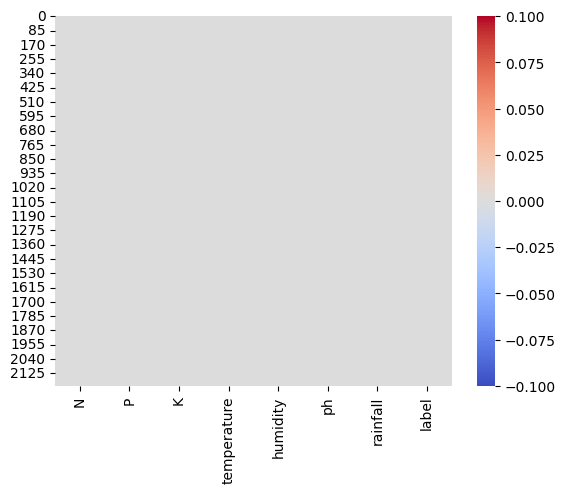

In [16]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<Axes: xlabel='ph', ylabel='Density'>

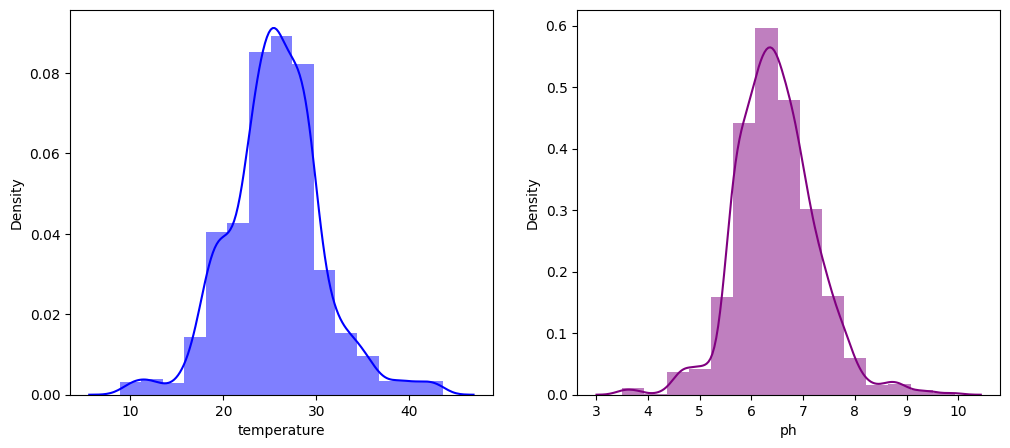

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="purple",bins=15,hist_kws={'alpha':0.5})

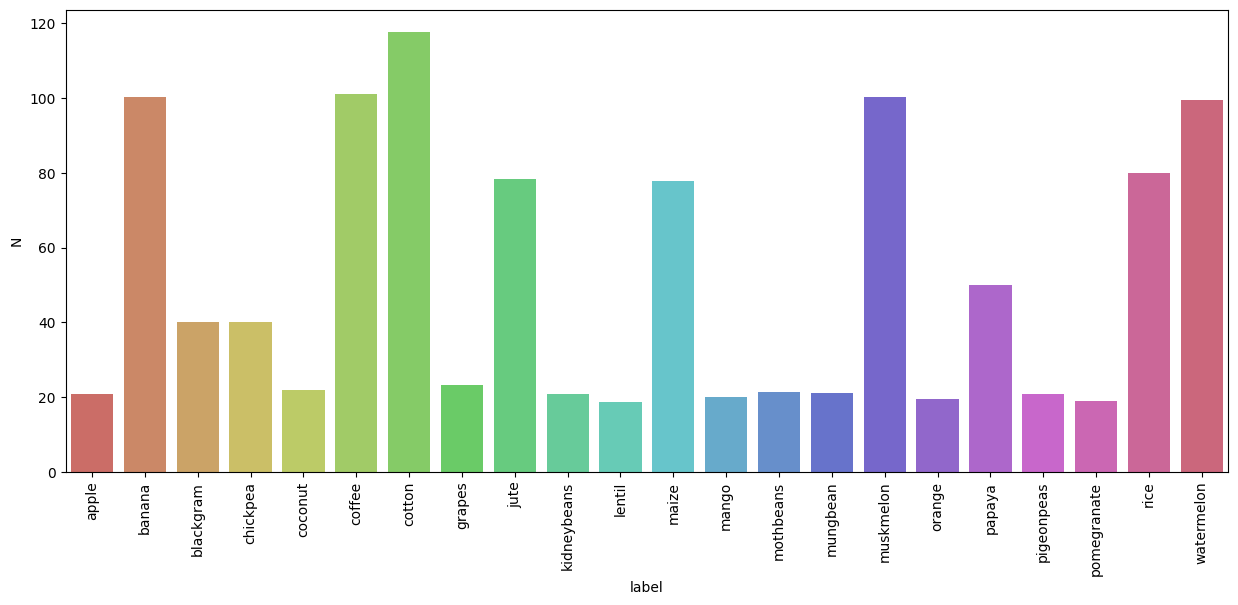

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(y='N', x='label', data=crop_summary_new, palette='hls')  # Specify 'data' parameter
plt.xticks(rotation=90)
plt.show()


In [19]:
numeric_df = df.select_dtypes(include=np.number)  # Select only numerical columns
correlation_matrix = numeric_df.corr()  # Calculate correlation matrix
correlation_matrix 

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

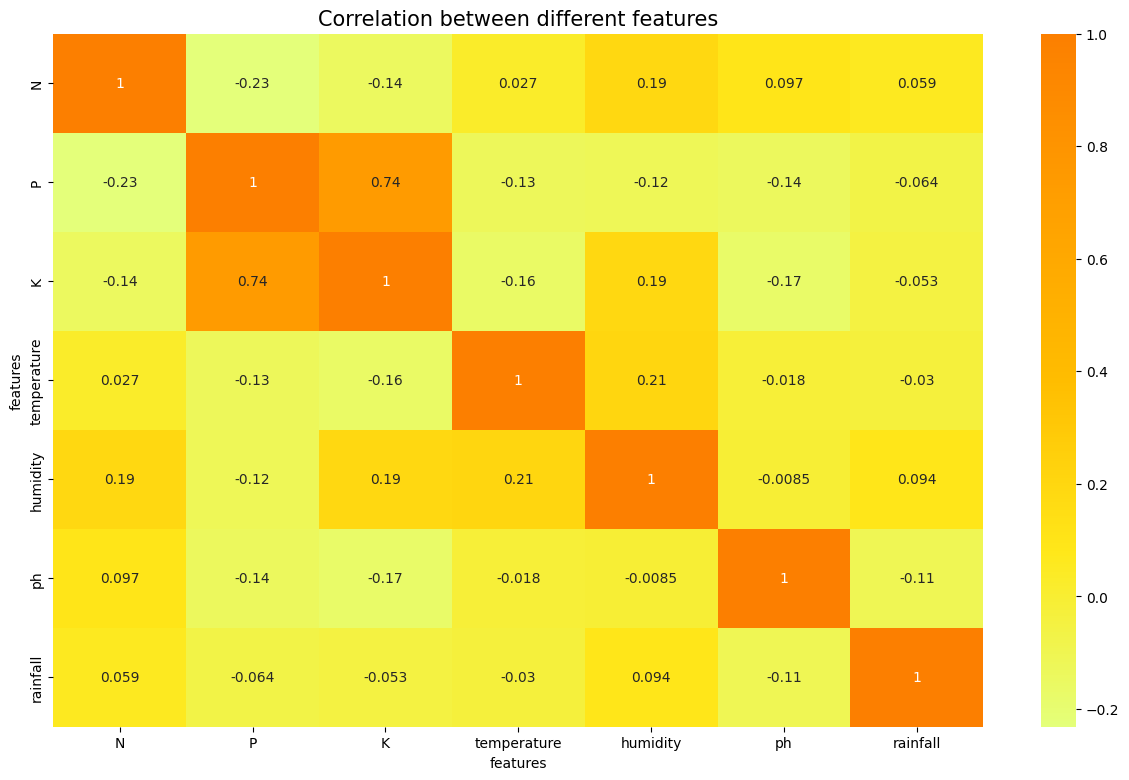

In [20]:
# Select only numerical columns for correlation calculation
numeric_data = df.select_dtypes(include=np.number) 

# Create a correlation matrix for the numerical data
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize=15, c='black')
plt.show()


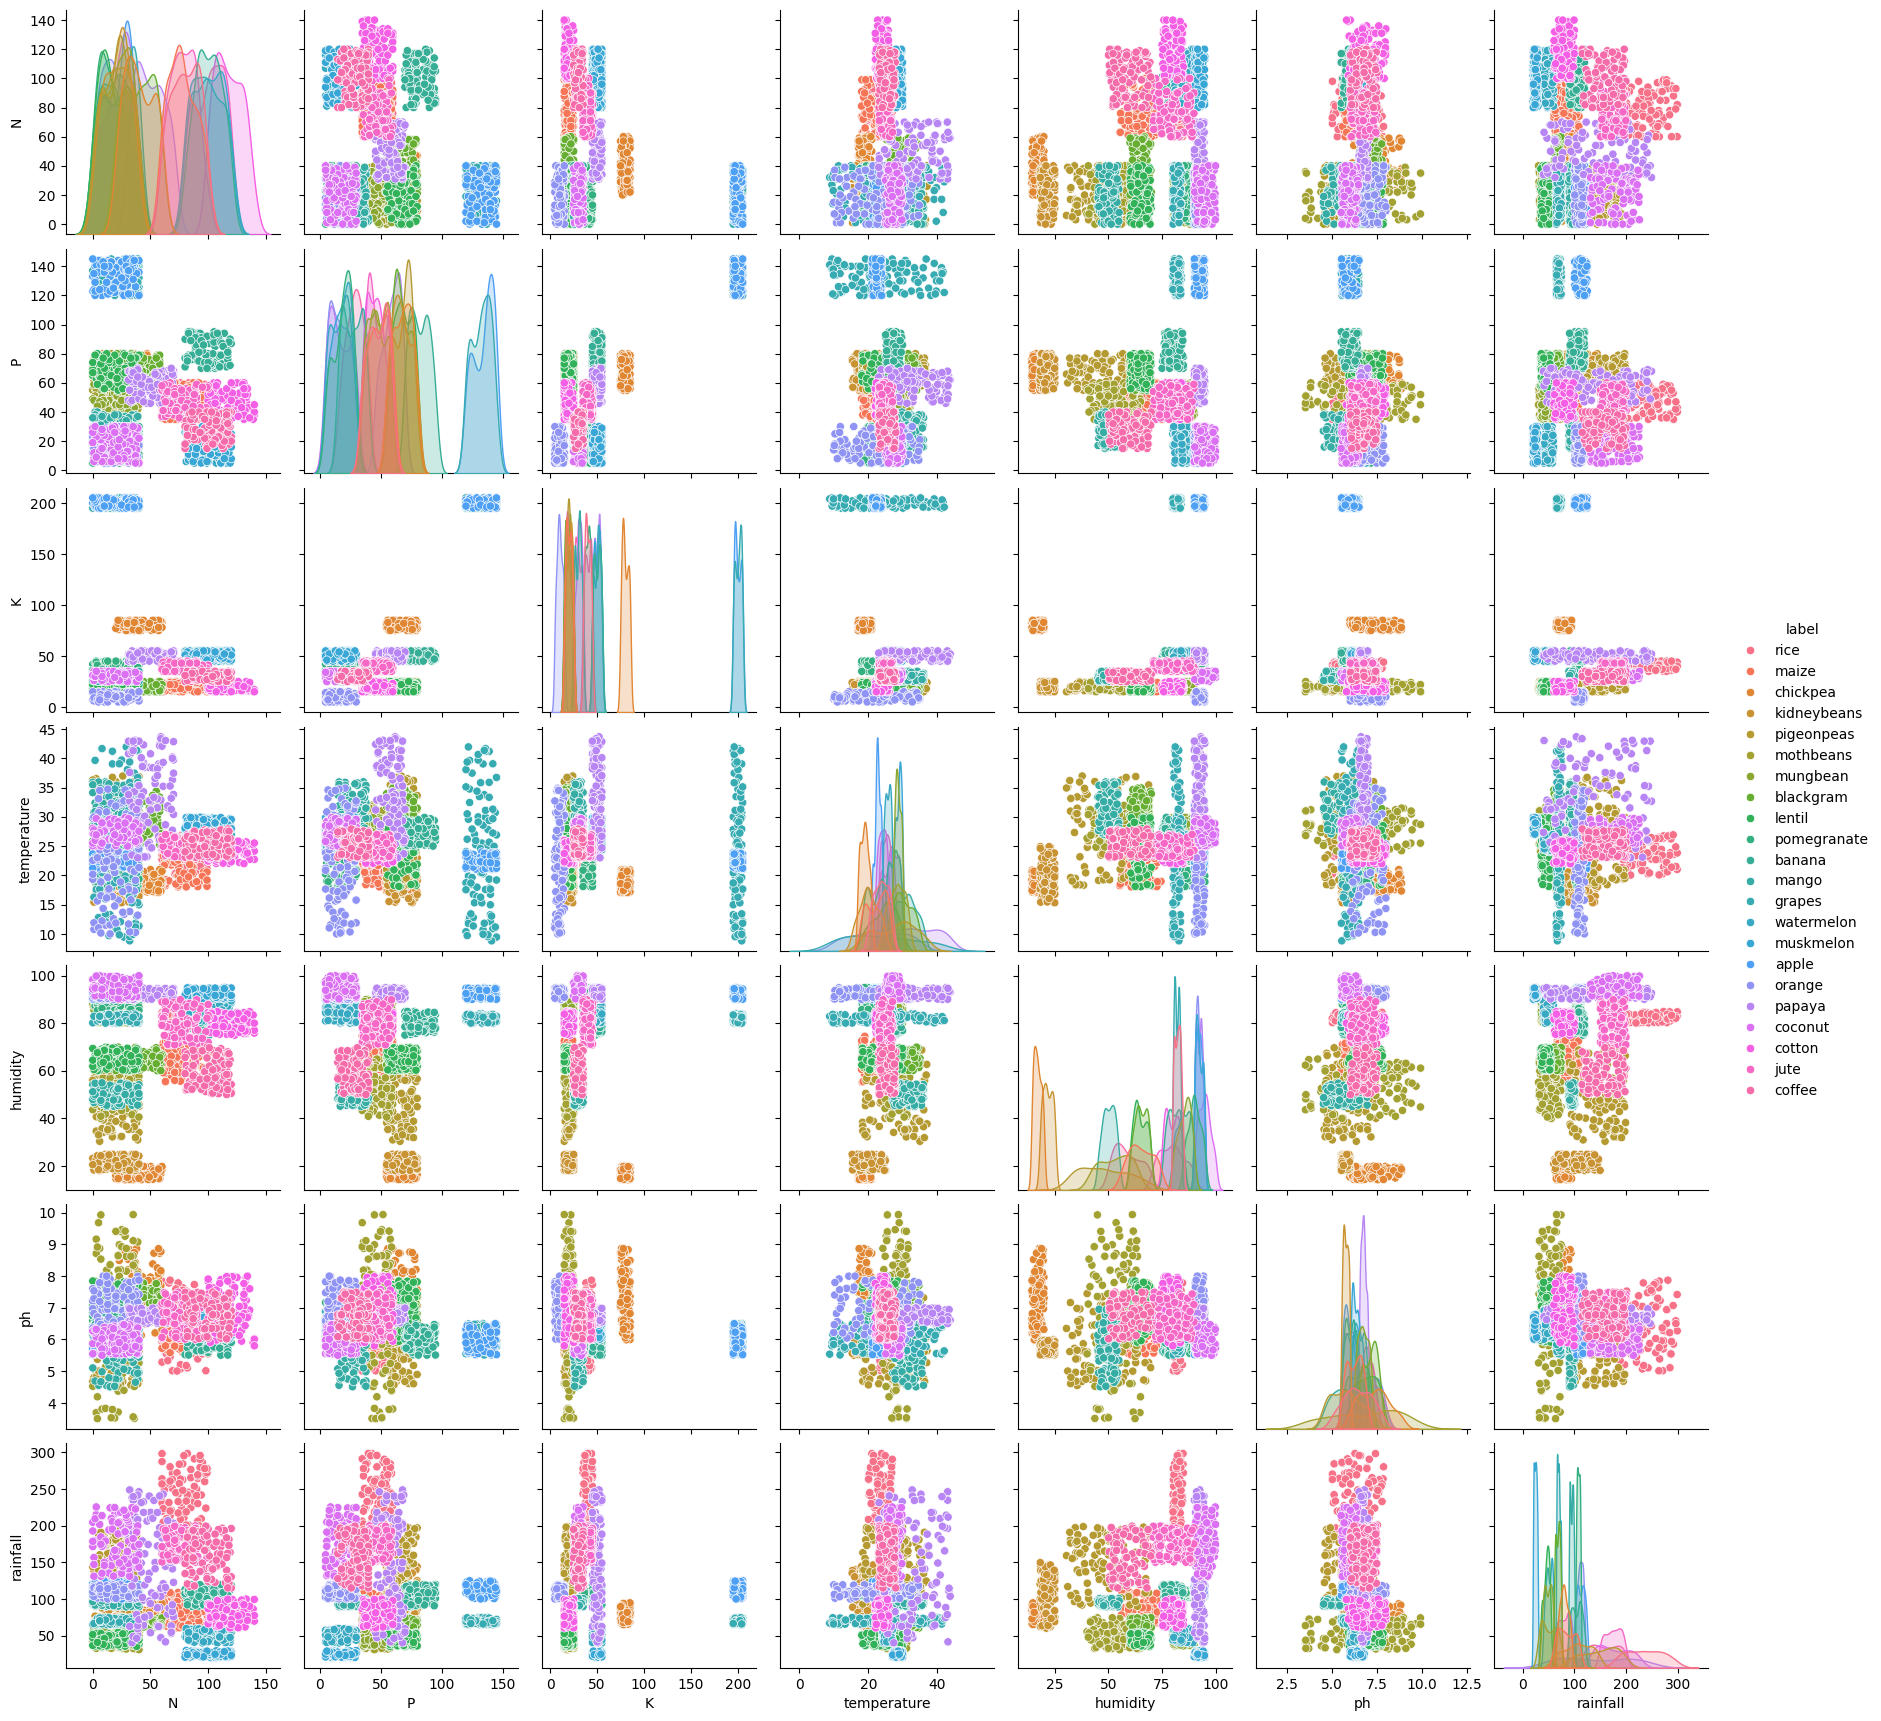

In [21]:
sns.pairplot(df,hue = 'label')

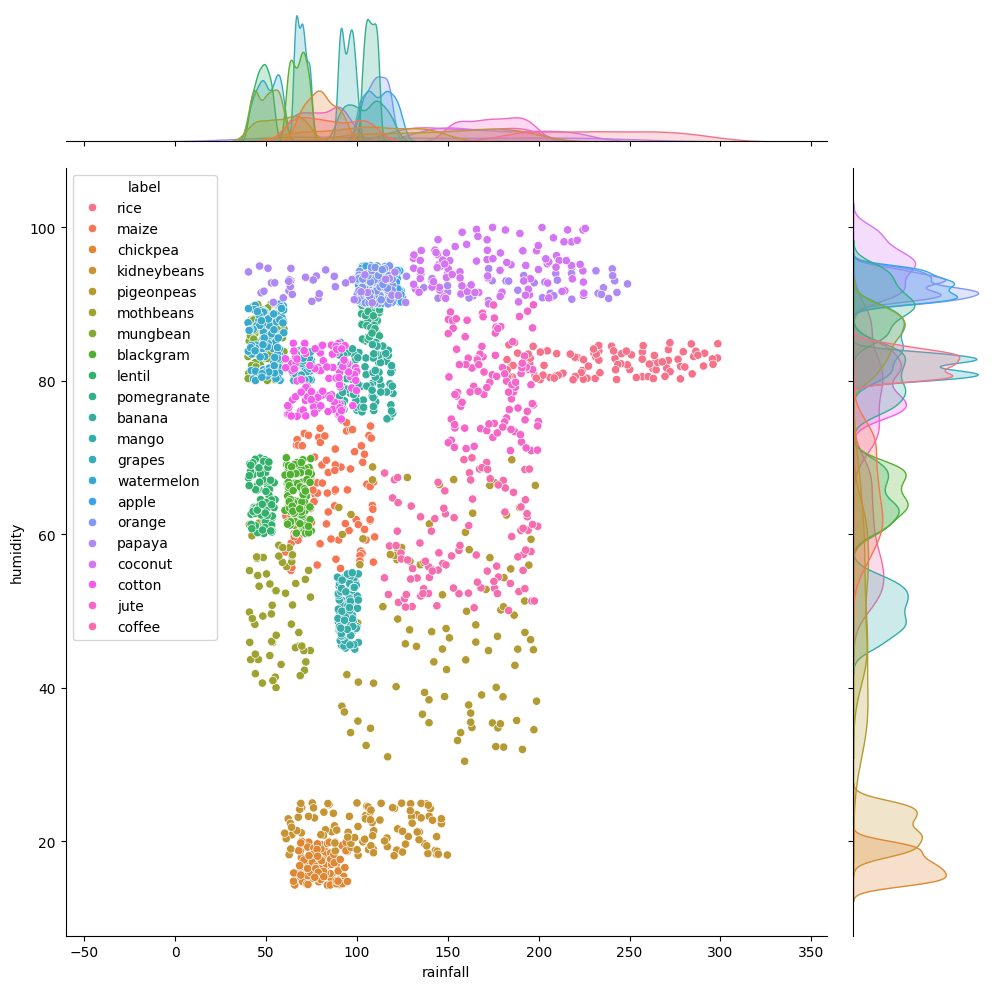

In [22]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<40) & 
                                                  (df['rainfall']>40)],height=10,hue="label")

In [23]:
import plotly.graph_objects as go  # Import the 'go' module from the plotly library

fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparison between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


## part-2


In [25]:
x=df.drop('label',axis=1)
y=df['label']

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [27]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1863 to 1061
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred1=model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
logistic_reg_acc=accuracy_score(y_test,y_pred1)
print("logistic accuracy is"+str(logistic_reg_acc))

logistic accuracy is0.9704545454545455


### DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred3=model2.predict(x_test)

In [36]:
decision_acc=accuracy_score(y_test,y_pred3)
print("Decision tree accuracy is"+str(decision_acc))

Decision tree accuracy is0.9954545454545455


## RandomForest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred4=model3.predict(x_test)

In [38]:
random_acc=accuracy_score(y_test,y_pred4)
print("Random forest accuracy is"+str(random_acc))

Random forest accuracy is0.9977272727272727


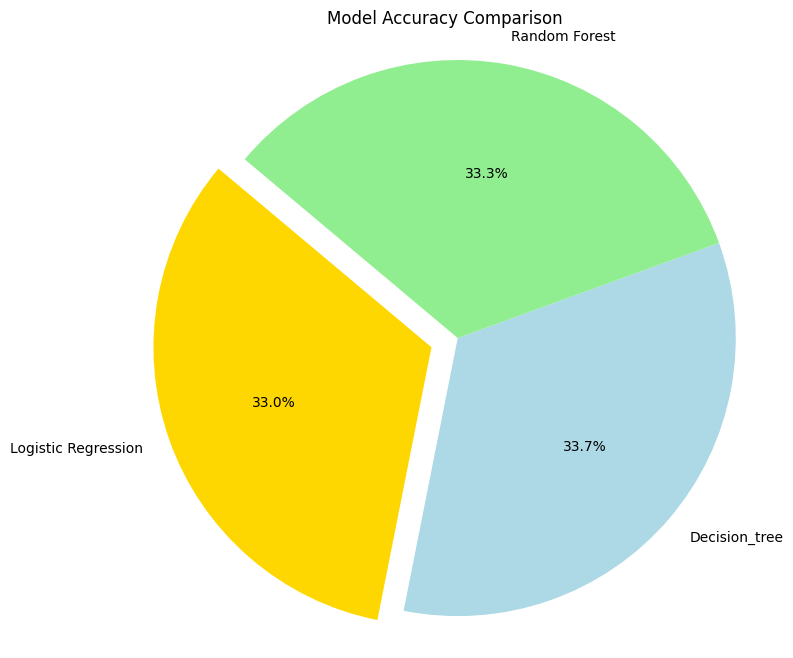

In [41]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Calculate accuracy scores for different models (example)
logistic_reg_acc = 0.97
Decision_tree = 0.99
random_forest_acc = 0.98

# Pie chart data
accuracy_scores = [logistic_reg_acc, Decision_tree, random_forest_acc]
labels = ['Logistic Regression', 'Decision_tree', 'Random Forest']
colors = ['gold', 'lightblue', 'lightgreen']
explode = (0.1, 0, 0)  # explode the 1st slice (Logistic Regression)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracy_scores, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Model Accuracy Comparison')

# Show the plot
plt.show()


In [53]:
import joblib
filename='crop app'
joblib.dump(model2,'crop app')

['crop app']

In [54]:
app=joblib.load('crop app')

In [55]:
arr=[[19 ,34 , 80 ,26.774637 ,66.413269 ,67 ,177.774507]]
result=app.predict(arr)

In [56]:
result

array(['mango'], dtype=object)